In [34]:
# Imported all necessary libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import datetime as dt
import pylab 
import scipy.stats as stats
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [35]:
# Load dataframe into df object.
df = pd.read_csv("D:\\Assignement 1\\Feature Engineering\\cleaned_dataset.csv")

In [36]:
df.head()

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
0,8.029348,8.065366,8.065941,8.021558,-3.54,16.0,2.0,2022.0,-0.911602
1,8.065350,7.982515,8.068773,7.976805,8.64,15.0,2.0,2022.0,-0.616112
2,7.982522,7.962437,7.093713,7.949490,2.06,14.0,2.0,2022.0,-0.739736
3,7.962154,7.978366,7.990557,7.950957,-1.61,13.0,2.0,2022.0,-1.193627
4,7.981949,8.030019,8.050809,7.965754,-4.69,11.0,2.0,2022.0,-0.497696


In [37]:
# This function will return new_dataframe after droping specific column.
def drop_column_from_df(dataframe_name,column_name):
    return dataframe_name.drop([column_name], axis=1)
df_train = drop_column_from_df(df,'Price')

#### Feature Transformation :-
    Feature transformation is the process of  transforming a feature in to a new one with specific funtion.

In [38]:
df_train.describe()

,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,6.296143,6.333997,6.264509,0.476247,15.768727,6.445693,2020.088015,1.524705
std,1.257221,1.254787,1.250708,4.240974,8.837695,3.497201,0.882893,1.238323
min,4.649665,4.664571,4.621044,-13.220000,1.000000,1.000000,2019.000000,-2.133349
25%,5.209991,5.238116,5.188697,-1.950000,8.000000,3.000000,2019.000000,0.530628
50%,5.813757,5.867261,5.756817,0.270000,16.000000,6.000000,2020.000000,1.994020
75%,7.669082,7.685429,7.634630,2.945000,23.000000,9.000000,2021.000000,2.432736
max,8.478107,8.489629,8.458595,15.000000,31.000000,12.000000,2022.000000,3.945845


Let's apply standardization on (Change %) column bcz its have different scale.

In [39]:
def apply_standardization(value):
    return round(((value-df_train['Change %'].mean())/df_train['Change %'].std()),2)
df_train['Change %'] = df_train['Change %'].apply(lambda value: apply_standardization(value))

Let's apply standardization on (Day) column bcz its have different scale.

In [40]:
def apply_standardization(value):
    return round(((value-df_train['Day'].mean())/df_train['Day'].std()),2)
df_train['Day'] = df_train['Day'].apply(lambda value: apply_standardization(value))

Let's apply standardization on (Month) column bcz its have different scale.

In [41]:
def apply_standardization(value):
    return round(((value-df_train['Month'].mean())/df_train['Month'].std()),2)
df_train['Month'] = df_train['Month'].apply(lambda value: apply_standardization(value))

Let's apply standardization on (Year) column bcz its have different scale.

In [42]:
def apply_standardization(value):
    return round(((value-df_train['Year'].mean())/df_train['Year'].std()),2)
df_train['Year'] = df_train['Year'].apply(lambda value: apply_standardization(value))

In [43]:
df_train.describe()

,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
count,1068.000000,1068.000000,1068.000000,1068.000000,1.068000e+03,1068.000000,1068.000000,1068.000000
mean,6.296143,6.333997,6.264509,0.000028,-5.405580e-18,-0.000515,-0.000159,1.524705
std,1.257221,1.254787,1.250708,1.000038,9.998917e-01,1.000744,0.998503,1.238323
min,4.649665,4.664571,4.621044,-3.230000,-1.670000e+00,-1.560000,-1.230000,-2.133349
25%,5.209991,5.238116,5.188697,-0.570000,-8.800000e-01,-0.990000,-1.230000,0.530628
50%,5.813757,5.867261,5.756817,-0.050000,3.000000e-02,-0.130000,-0.100000,1.994020
75%,7.669082,7.685429,7.634630,0.582500,8.200000e-01,0.730000,1.030000,2.432736
max,8.478107,8.489629,8.458595,3.420000,1.720000e+00,1.590000,2.170000,3.945845


In [44]:
df_train.head()

,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
0,8.065366,8.065941,8.021558,-0.95,0.03,-1.27,2.17,-0.911602
1,7.982515,8.068773,7.976805,1.92,-0.09,-1.27,2.17,-0.616112
2,7.962437,7.093713,7.949490,0.37,-0.20,-1.27,2.17,-0.739736
3,7.978366,7.990557,7.950957,-0.49,-0.31,-1.27,2.17,-1.193627
4,8.030019,8.050809,7.965754,-1.22,-0.54,-1.27,2.17,-0.497696


Let's make various graphs of features with respect to time, so that we can analyze how
features are correlated with time.


In [45]:
df.head()

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
0,8.029348,8.065366,8.065941,8.021558,-3.54,16.0,2.0,2022.0,-0.911602
1,8.065350,7.982515,8.068773,7.976805,8.64,15.0,2.0,2022.0,-0.616112
2,7.982522,7.962437,7.093713,7.949490,2.06,14.0,2.0,2022.0,-0.739736
3,7.962154,7.978366,7.990557,7.950957,-1.61,13.0,2.0,2022.0,-1.193627
4,7.981949,8.030019,8.050809,7.965754,-4.69,11.0,2.0,2022.0,-0.497696


In [50]:
# First of let combine day,month, year column and convert that into datetime format.
def combine_day_month_year(df_name, list_of_day_month_year_columns):
    for column in list_of_day_month_year_columns:
        df[column] = df[column].astype(str)
        df[column] = df[column].apply(lambda value: value.split('.')[0])
    df_name['Date'] = df_name[list_of_day_month_year_columns].apply(
        lambda x: '-'.join(x.values.astype(str)), axis="columns")
    df_name['Date'] = pd.to_datetime(df_name['Date'])


In [51]:
combine_day_month_year(
    df_name=df,
    list_of_day_month_year_columns=['Year','Month','Day'],
)

In [91]:
# Draw line graph
def line_graph(df_name, x_axis_column, y_axis_column, x_axis_title="", y_axis_title=""):
    g = sns.relplot(
        data=df_name,
        x=x_axis_column, y=y_axis_column,
        kind="line",
        height=5, aspect=2
    )
    if(x_axis_title=="" or y_axis_title==""):
        g = (g.set_axis_labels(x_axis_column,y_axis_column))
    else:
        g = (g.set_axis_labels(x_axis_title,y_axis_title))


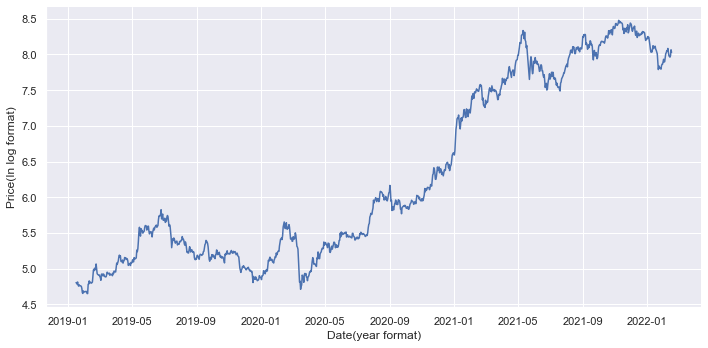

In [92]:
# Time vs Price
line_graph(
    df_name=df,
    x_axis_column='Date',
    y_axis_column='Price',
    x_axis_title='Date(year format)',
    y_axis_title='Price(In log format)'
    
)

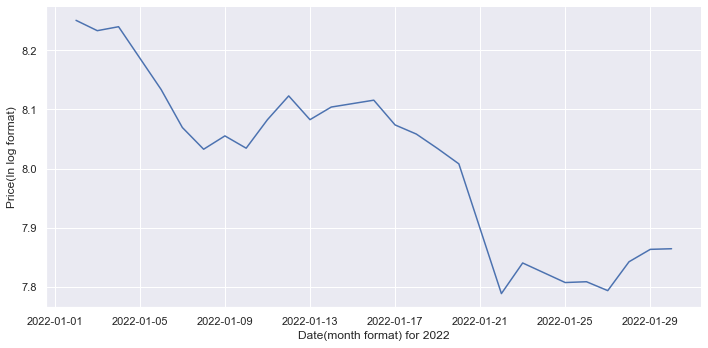

In [95]:
# Time vs Price
line_graph(
    df_name=df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-01-31')],
    x_axis_column='Date',
    y_axis_column='Price',
    x_axis_title='Date(month format) for 2022',
    y_axis_title='Price(In log format)'
)

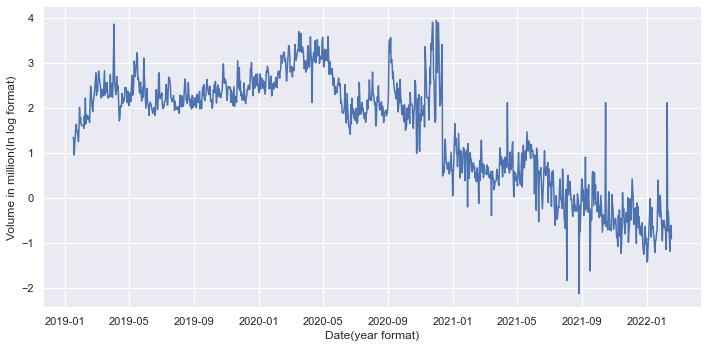

In [100]:
# Time vs Volume
line_graph(
    df_name=df,
    x_axis_column='Date',
    y_axis_column='Volume(In Million)',
    x_axis_title="Date(year format)",
    y_axis_title='Volume in million(In log format)'
)

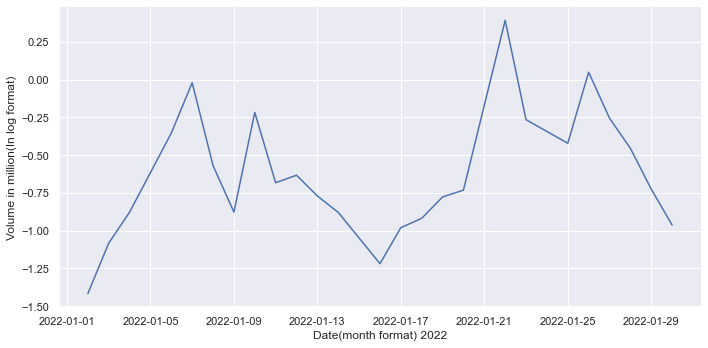

In [103]:
# Time vs Volume
line_graph(
    df_name=df[(df['Date'] > '2022-01-01') & (df['Date'] < '2022-01-31')],
    x_axis_column='Date',
    y_axis_column='Volume(In Million)',
    x_axis_title="Date(month format) 2022",
    y_axis_title='Volume in million(In log format)'
)

Correlation between features for dimensionality reduction

In [105]:
#Using Pearson Correlation
def correlation_matrix(df_name):
    plt.figure(figsize=(12,10))
    cor = df_name.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
    plt.show()

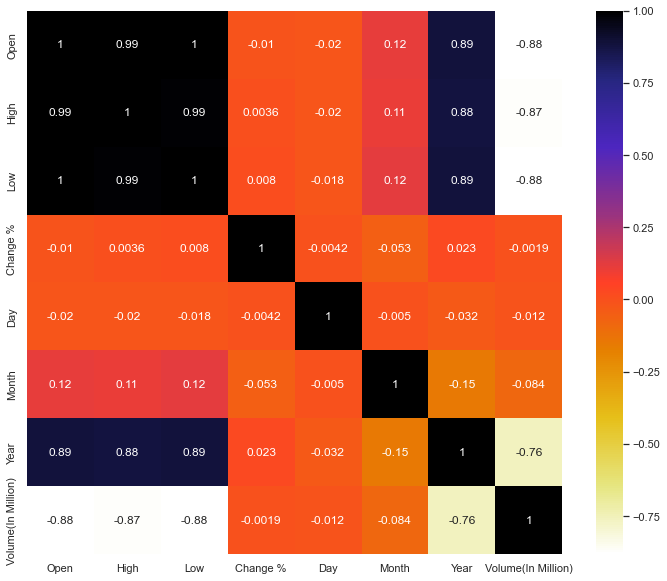

In [106]:
correlation_matrix(df_name=df_train)

By Analyzing above fig, we can say that Low, High,Open columns are highly correlated with each other so that we can eliminate one of these column in order to reduce our feature dimensionality, however we have very less features right now in our dataset so let's keep it as it is.

In [107]:
df_train.to_csv('D:\\Assignement 1\\Data Modeling\\train_test_dataset.csv',index=False)